<a href="https://colab.research.google.com/github/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/CKME_136_Analysis_of_the_National_Hockey_League_Roles_and_Lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of National Hockey League Roles and Lines

By Ray Hu

Importing python libraries for later use

In [2]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Mounting personal Google Drive 

This will allow for easier access when saving files or csvs

In [3]:
# Mounting Google Drive for access to datasets

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#  Change working directory to Google Drive then Output Present Working Directory

%cd /content/drive/My Drive/CKME 136 - CAPSTONE PROJECT

!pwd

/content/drive/My Drive/CKME 136 - CAPSTONE PROJECT
/content/drive/My Drive/CKME 136 - CAPSTONE PROJECT


# Reading the data sets into Google Colab

There are 12 csv files for skaters ranging from the 2008-2009 to 2019-2020 seasons.

Additionally, there are another 12 csv files for line up used by the NHL for those same seasons.

In [80]:
# Importing NHL data sets from Github

# Skaters data set from the 2008-2009 season through to the 2019-2020 season

urlskaters2008 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202008.csv?raw=true'
skaters2008 = pd.read_csv(urlskaters2008)

urlskaters2009 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202009.csv?raw=true'
skaters2009 = pd.read_csv(urlskaters2009)

urlskaters2010 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202010.csv?raw=true'
skaters2010 = pd.read_csv(urlskaters2010)

urlskaters2011 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202011.csv?raw=true'
skaters2011 = pd.read_csv(urlskaters2011)

urlskaters2012 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202012.csv?raw=true'
skaters2012 = pd.read_csv(urlskaters2012)

urlskaters2013 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202013.csv?raw=true'
skaters2013 = pd.read_csv(urlskaters2013)

urlskaters2014 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202014.csv?raw=true'
skaters2014 = pd.read_csv(urlskaters2014)

urlskaters2015 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202015.csv?raw=true'
skaters2015 = pd.read_csv(urlskaters2015)

urlskaters2016 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202016.csv?raw=true'
skaters2016 = pd.read_csv(urlskaters2016)

urlskaters2017 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202017.csv?raw=true'
skaters2017 = pd.read_csv(urlskaters2017)

urlskaters2018 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202018.csv?raw=true'
skaters2018 = pd.read_csv(urlskaters2018)

urlskaters2019 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Skaters%202019.csv?raw=true'
skaters2019 = pd.read_csv(urlskaters2019)

In [6]:
# Lineups data set from the 2008-2009 season through to the 2019-2020 season

urllines2008 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Lines%202008.csv?raw=true'
lines2008 = pd.read_csv(urllines2008)

urllines2009 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Lines%202009.csv?raw=true'
lines2009 = pd.read_csv(urllines2009)

urllines2010 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Lines%202010.csv?raw=true'
lines2010 = pd.read_csv(urllines2010)

urllines2011 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Lines%202011.csv?raw=true'
lines2011 = pd.read_csv(urllines2011)

urllines2012 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Lines%202012.csv?raw=true'
lines2012 = pd.read_csv(urllines2012)

urllines2013 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Lines%202013.csv?raw=true'
lines2013 = pd.read_csv(urllines2013)

urllines2014 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Lines%202014.csv?raw=true'
lines2014 = pd.read_csv(urllines2014)

urllines2015 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Lines%202015.csv?raw=true'
lines2015 = pd.read_csv(urllines2015)

urllines2016 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Lines%202016.csv?raw=true'
lines2016 = pd.read_csv(urllines2016)

urllines2017 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Lines%202017.csv?raw=true'
lines2017 = pd.read_csv(urllines2017)

urllines2018 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Lines%202018.csv?raw=true'
lines2018 = pd.read_csv(urllines2018)

urllines2019 = 'https://github.com/raysinghu/CKME-136---CAPSTONE-PROJECT/blob/master/Lines%202019.csv?raw=true'
lines2019 = pd.read_csv(urllines2019)

# Exploratory Analysis

Let's view the general layout of the data set for skaters in the 2008 to 2009 season. 

Note that each player is given a unique 'playerId' which can later be used as a unique key to join the 'skater' and 'lines' data sets together.

The data set contains over 150 features or columns. Many of the features are advanced stats that are repeated by calculated with different algorithms (i.e. corsi vs fenwick).

Records for all hockey players are broken down into different 'situations' but also summed up in the 'all' situation. For our purposes, we will be only looking at stats derived from the 'all' situation.

In [10]:
# Show the 'skaters' 2008-2009 season data set

skaters2008

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,...,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8462196,2008,Stephane Robidas,DAL,D,other,72,6729.0,105.0,31.93,0.51,0.36,0.59,0.46,0.58,0.46,134.0,22.30,1.91,1.59,4.82,0.81,14.80,8.20,1.80,1.91,1.80,3.0,1.0,24.0,10.0,16.0,50.0,4.0,0.0,1.0,0.0,3.0,2.0,18.0,...,62.46,12.64,12.11,12.64,12.11,65.0,30.0,23.0,118.0,11.0,10.0,2.0,61.0,16.0,18.0,2.14,2.05,8.45,3.0,0.0,8.0,118.00,95.0,95.00,1.24,2.12,2.12,11.44,11.44,11.10,6.79,12.11,106.0,122.0,0.14,0.00,4.0,0.0,3.0,0.0
1,8462196,2008,Stephane Robidas,DAL,D,all,72,105958.0,2026.0,31.71,0.53,0.45,0.53,0.49,0.53,0.50,114.0,163.56,9.17,11.35,38.96,5.25,104.62,69.79,8.65,9.14,8.62,12.0,11.0,158.0,83.0,101.0,342.0,26.0,3.0,13.0,0.0,32.0,8.0,112.0,...,790.57,79.35,77.02,79.92,77.57,779.0,347.0,340.0,1466.0,83.0,52.0,14.0,841.0,203.0,82.0,25.35,24.13,29.87,24.0,24.0,35.0,1474.13,1126.0,1130.82,12.35,11.59,11.93,78.40,78.89,77.25,95.61,116.39,2161.0,2223.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8462196,2008,Stephane Robidas,DAL,D,5on5,72,74053.0,1480.0,31.71,0.51,0.47,0.50,0.50,0.51,0.51,160.0,66.94,2.16,3.70,18.15,2.28,40.78,31.94,2.12,2.13,2.09,6.0,6.0,65.0,34.0,47.0,146.0,14.0,2.0,6.0,0.0,17.0,3.0,38.0,...,552.96,45.36,44.29,45.93,44.84,546.0,234.0,247.0,1027.0,44.0,33.0,11.0,607.0,133.0,40.0,18.80,15.62,10.94,14.0,17.0,13.0,1035.13,780.0,784.82,7.35,7.31,7.65,44.28,44.77,44.13,66.29,74.66,1678.0,1647.0,3.64,0.18,91.0,10.0,74.0,8.0
3,8462196,2008,Stephane Robidas,DAL,D,4on5,72,10397.0,235.0,30.26,0.07,0.08,0.12,0.13,0.13,0.15,203.0,4.47,0.27,0.21,0.46,0.12,1.36,3.58,0.27,0.27,0.27,0.0,1.0,5.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,144.73,18.46,17.74,18.46,17.74,133.0,73.0,63.0,269.0,26.0,9.0,1.0,139.0,46.0,21.0,3.42,5.51,9.53,7.0,6.0,13.0,269.00,206.0,206.00,3.42,2.16,2.16,19.59,19.59,18.94,2.24,27.37,57.0,380.0,0.15,0.00,3.0,0.0,3.0,0.0
4,8462196,2008,Stephane Robidas,DAL,D,5on4,72,14779.0,206.0,31.69,0.92,0.93,0.90,0.88,0.89,0.86,123.0,68.33,4.79,5.80,15.10,2.01,47.06,25.24,4.43,4.79,4.43,3.0,3.0,62.0,38.0,37.0,137.0,7.0,1.0,6.0,0.0,11.0,2.0,55.0,...,26.11,2.57,2.57,2.57,2.57,31.0,8.0,7.0,46.0,2.0,0.0,0.0,29.0,7.0,3.0,0.81,0.81,0.96,0.0,1.0,1.0,46.00,39.0,39.00,0.28,0.00,0.00,2.72,2.72,2.72,19.15,1.47,294.0,42.0,0.13,0.00,6.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

We can view more indepth information from both data sets.

In [7]:
# See the basic statistical information about the skaters 2008 to 2009 season

skaters2008.describe()

,playerId,season,games_played,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,...,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
count,4.425000e+03,4425.0,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.00000,4425.000000,4425.000000,4425.000000,4425.000000,...,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.00000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000
mean,8.468231e+06,2008.0,49.888136,19729.549831,425.840904,19.540558,0.454576,0.474084,0.462475,0.474466,0.459021,0.474868,190.401130,32.531609,3.006992,2.220728,7.297347,1.059157,18.242653,13.790988,2.894852,3.012558,2.900215,2.962712,2.480678,33.495819,12.803390,14.579887,60.879096,8.599096,3.155706,2.167910,0.579661,7.226667,1.008362,14.87209,17.869831,30.340113,43.143503,5.818757,...,154.647772,14.083912,13.592493,14.111069,13.619134,159.218757,60.842938,69.357740,289.419435,14.737853,10.176949,2.689266,168.761808,38.759322,12.540565,4.992249,4.658016,4.433711,5.000904,4.914802,4.822147,289.749243,220.061695,220.359449,2.298936,2.210606,2.326678,13.844463,13.863919,13.563234,36.483878,37.092389,755.51774,764.612881,0.342353,0.184400,8.028927,4.691751,6.295593,3.770621
std,5.111543e+03,0.0,29.036244,28167.346784,597.310501,22.923970,0.297465,0.271288,0.280049,0.258003,0.280259,0.253018,161.489945,51.764956,5.166320,3.568435,11.606012,1.682337,28.878287,21.679924,4.975064,5.180617,4.988992,5.225106,4.167997,53.270269,20.331759,23.634221,94.926149,14.204388,5.879281,3.799039,1.326303,11.757704,1.912336,23.66723,28.389960,48.040343,67.804837,9.538310,...,223.275691,19.683594,18.995936,19.723451,19.035308,229.679473,87.993254,101.527

In [22]:
# See the basic statistical information about the lines 2008 to 2009 season

lines2008.describe()

,games_played,icetime,iceTimeRank,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,...,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst
count,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,...,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.00000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000
mean,5.803569,1011.188292,54.851385,0.384318,0.411746,0.388334,7.827547,0.615445,0.499891,1.836812,0.252273,4.355124,3.399698,0.599069,0.617279,0.600871,8.019565,3.065190,3.554156,14.638911,0.646893,0.491626,0.126937,1.791595,0.237439,3.488652,4.428706,7.372672,10.437862,1.592268,3.857802,7.367507,6.785412,1.960322,2.339020,8.719987,1.910941,0.453827,0.261122,0.228562,...,0.613576,0.597488,7.989670,3.053138,3.526452,14.569260,0.640476,0.486852,0.124589,1.780952,0.234700,3.473079,4.426906,7.349194,10.402332,1.557756,3.78956,7.359368,6.818125,1.971827,2.336672,8.694475,1.897637,0.450697,0.260092,0.227018,0.124730,0.259665,0.245265,0.135545,14.591913,11.042808,11.062877,1.349663,0.102295,0.098720,0.103928,0.601556,0.602898,0.594692
std,9.470199,3770.954152,64.564520,0.368892,0.339027,0.350523,29.532109,2.358592,1.892131,6.930610,0.954260,16.474674,12.800772,2.291147,2.368496,2.300848,30.421432,11.576853,13.388456,55.049651,2.618690,2.069120,0.607930,6.990563,1.040075,13.588701,16.309155,27.938843,39.360688,5.804151,13.974649,29.741279,24.621873,7.563723,8.934665,32.872243,7.404209,1.917433,0.990165,0.888665,...,2.211340,2.149438,28.990096,11.065067,12.847720,52.493447,2.357139,1.910338,0.560195,6.843033,0.997968,12.604126,15.994130,26.7780

# Feature Selection for Skaters

The first objective of feature selection will be to filter out the other situations. By doing so, we are left with the cumulative records found in 'all' situations. 

Secondly, we want to pick out features that are often associated with a player role. Skillful players are often those who are given the puck to shoot in important game situations leading to them having higher shots on goal and points. Addtionally, their puck handling skills often mean they win faceoffs more and are able to steal (takeaway) the puck from the opposing team.

On the other hand, enforcers are those players that often thought of as players that bring more physicality into the game. This in turn means more hits and penalties. Enforcers are usually the bigger players and are often fulfilling the role as defensemen. A key responsibility of defensemen is to attempt to block opposing players from shooting on their goal.

The statistics that help define a skillful player:
*   I_F_shotsOnGoal
*   I_F_points
*   faceoffsWon
*   I_F_takeaways

The statistics that help define an enforcer-like player:
*   I_F_hits
*   penalties
*   penalityMinutes
*   shotsBlockedByPlayer



In [103]:
# FEATURE SELECTION

# Keep only the rows (or records) that contain all situations of play. 
# This step is needed in order to remove repeat information.

skaters2008 = skaters2008[skaters2008.situation == 'all']
skaters2009 = skaters2009[skaters2009.situation == 'all']
skaters2010 = skaters2010[skaters2010.situation == 'all']
skaters2011 = skaters2011[skaters2011.situation == 'all']
skaters2012 = skaters2012[skaters2012.situation == 'all']
skaters2013 = skaters2013[skaters2013.situation == 'all']
skaters2014 = skaters2014[skaters2014.situation == 'all']
skaters2015 = skaters2015[skaters2015.situation == 'all']
skaters2016 = skaters2016[skaters2016.situation == 'all']
skaters2017 = skaters2017[skaters2017.situation == 'all']
skaters2018 = skaters2018[skaters2018.situation == 'all']
skaters2019 = skaters2019[skaters2019.situation == 'all']

In [104]:
# We are most interested in looking at the following features for when defining player roles:

skaters2008_initialfilter = skaters2008.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_shotsOnGoal',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'penalityMinutes',
                                           'shotsBlockedByPlayer']]

Lets run a correlation test to see if there are any features that we picked that are overly correlated with each other.

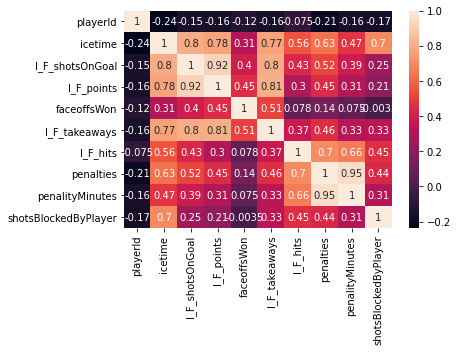

In [105]:
# Correlation matrix is performed to see if there are any of the selected features that are highly correlated

corrSkaters2008_initialfilter = skaters2008_initialfilter.corr()

sns.heatmap(corrSkaters2008_initialfilter, annot=True)
plt.show()

From the Correlation matrix, we discover that 'penalties' and 'penaltyMinutes' were highly correlated (0.95) as were 'I_F_shotsOnGoal' and 'I_F_points' (0.92).

We choose to remove any features that overlap with a correlation greater than 0.90

In [113]:
# Revised the features by dropping 'penaltyMinutes' and 'I_F_shotsOnGoal' 

skaters2008_filtered = skaters2008.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2009_filtered = skaters2009.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2010_filtered = skaters2010.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2011_filtered = skaters2011.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2012_filtered = skaters2012.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2013_filtered = skaters2013.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2014_filtered = skaters2014.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2015_filtered = skaters2015.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2016_filtered = skaters2016.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2017_filtered = skaters2017.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2018_filtered = skaters2018.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

skaters2019_filtered = skaters2019.loc[:, ['playerId',
                                           'name',
                                           'icetime',
                                           'I_F_points',
                                           'faceoffsWon',
                                           'I_F_takeaways',
                                           'I_F_hits',
                                           'penalties',
                                           'shotsBlockedByPlayer']]

# Standardizing the Features

In order to be able to compare between players, their stats need to be standardized as most of their stats are seasonal totals but do not reflect the amount of game minutes played to reach those totals.

The ice time is originally recorded in seconds but we convert that into minutes and then scale all other stats by a per minute rate.

In [114]:
# Standardizing the features such that they are all per game minutes played

skaters2008_filtered['Ice_Time_(mins)'] = skaters2008['icetime'] / 60
skaters2008_filtered['Points_Per_Min'] = skaters2008['I_F_points'] / skaters2008_filtered['Ice_Time_(mins)']
skaters2008_filtered['Faceoffs_Won_Per_Min'] = skaters2008['faceoffsWon'] / skaters2008_filtered['Ice_Time_(mins)']
skaters2008_filtered['Takeaways_Per_Min'] = skaters2008['I_F_takeaways'] / skaters2008_filtered['Ice_Time_(mins)']
skaters2008_filtered['Hits_Per_Min'] = skaters2008['I_F_hits'] / skaters2008_filtered['Ice_Time_(mins)']
skaters2008_filtered['Penalties_Per_Min'] = skaters2008['penalties'] / skaters2008_filtered['Ice_Time_(mins)']
skaters2008_filtered['Shots_Blocked_Per_Min'] = skaters2008['shotsBlockedByPlayer'] / skaters2008_filtered['Ice_Time_(mins)']
skaters2008_filtered.drop(skaters2008_filtered.iloc[:, 2:9], inplace=True, axis=1)

skaters2009_filtered['Ice_Time_(mins)'] = skaters2009['icetime'] / 60
skaters2009_filtered['Points_Per_Min'] = skaters2009['I_F_points'] / skaters2009_filtered['Ice_Time_(mins)']
skaters2009_filtered['Faceoffs_Won_Per_Min'] = skaters2009['faceoffsWon'] / skaters2009_filtered['Ice_Time_(mins)']
skaters2009_filtered['Takeaways_Per_Min'] = skaters2009['I_F_takeaways'] / skaters2009_filtered['Ice_Time_(mins)']
skaters2009_filtered['Hits_Per_Min'] = skaters2009['I_F_hits'] / skaters2009_filtered['Ice_Time_(mins)']
skaters2009_filtered['Penalties_Per_Min'] = skaters2009['penalties'] / skaters2009_filtered['Ice_Time_(mins)']
skaters2009_filtered['Shots_Blocked_Per_Min'] = skaters2009['shotsBlockedByPlayer'] / skaters2009_filtered['Ice_Time_(mins)']
skaters2009_filtered.drop(skaters2009_filtered.iloc[:, 2:9], inplace=True, axis=1)

skaters2010_filtered['Ice_Time_(mins)'] = skaters2010['icetime'] / 60
skaters2010_filtered['Points_Per_Min'] = skaters2010['I_F_points'] / skaters2010_filtered['Ice_Time_(mins)']
skaters2010_filtered['Faceoffs_Won_Per_Min'] = skaters2010['faceoffsWon'] / skaters2010_filtered['Ice_Time_(mins)']
skaters2010_filtered['Takeaways_Per_Min'] = skaters2010['I_F_takeaways'] / skaters2010_filtered['Ice_Time_(mins)']
skaters2010_filtered['Hits_Per_Min'] = skaters2010['I_F_hits'] / skaters2010_filtered['Ice_Time_(mins)']
skaters2010_filtered['Penalties_Per_Min'] = skaters2010['penalties'] / skaters2010_filtered['Ice_Time_(mins)']
skaters2010_filtered['Shots_Blocked_Per_Min'] = skaters2010['shotsBlockedByPlayer'] / skaters2010_filtered['Ice_Time_(mins)']
skaters2010_filtered.drop(skaters2010_filtered.iloc[:, 2:9], inplace=True, axis=1)

skaters2011_filtered['Ice_Time_(mins)'] = skaters2011['icetime'] / 60
skaters2011_filtered['Points_Per_Min'] = skaters2011['I_F_points'] / skaters2011_filtered['Ice_Time_(mins)']
skaters2011_filtered['Faceoffs_Won_Per_Min'] = skaters2011['faceoffsWon'] / skaters2011_filtered['Ice_Time_(mins)']
skaters2011_filtered['Takeaways_Per_Min'] = skaters2011['I_F_takeaways'] / skaters2011_filtered['Ice_Time_(mins)']
skaters2011_filtered['Hits_Per_Min'] = skaters2011['I_F_hits'] / skaters2011_filtered['Ice_Time_(mins)']
skaters2011_filtered['Penalties_Per_Min'] = skaters2011['penalties'] / skaters2011_filtered['Ice_Time_(mins)']
skaters2011_filtered['Shots_Blocked_Per_Min'] = skaters2011['shotsBlockedByPlayer'] / skaters2011_filtered['Ice_Time_(mins)']
skaters2011_filtered.drop(skaters2011_filtered.iloc[:, 2:9], inplace=True, axis=1)

skaters2012_filtered['Ice_Time_(mins)'] = skaters2012['icetime'] / 60
skaters2012_filtered['Points_Per_Min'] = skaters2012['I_F_points'] / skaters2012_filtered['Ice_Time_(mins)']
skaters2012_filtered['Faceoffs_Won_Per_Min'] = skaters2012['faceoffsWon'] / skaters2012_filtered['Ice_Time_(mins)']
skaters2012_filtered['Takeaways_Per_Min'] = skaters2012['I_F_takeaways'] / skaters2012_filtered['Ice_Time_(mins)']
skaters2012_filtered['Hits_Per_Min'] = skaters2012['I_F_hits'] / skaters2012_filtered['Ice_Time_(mins)']
skaters2012_filtered['Penalties_Per_Min'] = skaters2012['penalties'] / skaters2012_filtered['Ice_Time_(mins)']
skaters2012_filtered['Shots_Blocked_Per_Min'] = skaters2012['shotsBlockedByPlayer'] / skaters2012_filtered['Ice_Time_(mins)']
skaters2012_filtered.drop(skaters2012_filtered.iloc[:, 2:9], inplace=True, axis=1)

skaters2013_filtered['Ice_Time_(mins)'] = skaters2013['icetime'] / 60
skaters2013_filtered['Points_Per_Min'] = skaters2013['I_F_points'] / skaters2013_filtered['Ice_Time_(mins)']
skaters2013_filtered['Faceoffs_Won_Per_Min'] = skaters2013['faceoffsWon'] / skaters2013_filtered['Ice_Time_(mins)']
skaters2013_filtered['Takeaways_Per_Min'] = skaters2013['I_F_takeaways'] / skaters2013_filtered['Ice_Time_(mins)']
skaters2013_filtered['Hits_Per_Min'] = skaters2013['I_F_hits'] / skaters2013_filtered['Ice_Time_(mins)']
skaters2013_filtered['Penalties_Per_Min'] = skaters2013['penalties'] / skaters2013_filtered['Ice_Time_(mins)']
skaters2013_filtered['Shots_Blocked_Per_Min'] = skaters2013['shotsBlockedByPlayer'] / skaters2013_filtered['Ice_Time_(mins)']
skaters2013_filtered.drop(skaters2013_filtered.iloc[:, 2:9], inplace=True, axis=1)

skaters2014_filtered['Ice_Time_(mins)'] = skaters2014['icetime'] / 60
skaters2014_filtered['Points_Per_Min'] = skaters2014['I_F_points'] / skaters2014_filtered['Ice_Time_(mins)']
skaters2014_filtered['Faceoffs_Won_Per_Min'] = skaters2014['faceoffsWon'] / skaters2014_filtered['Ice_Time_(mins)']
skaters2014_filtered['Takeaways_Per_Min'] = skaters2014['I_F_takeaways'] / skaters2014_filtered['Ice_Time_(mins)']
skaters2014_filtered['Hits_Per_Min'] = skaters2014['I_F_hits'] / skaters2014_filtered['Ice_Time_(mins)']
skaters2014_filtered['Penalties_Per_Min'] = skaters2014['penalties'] / skaters2014_filtered['Ice_Time_(mins)']
skaters2014_filtered['Shots_Blocked_Per_Min'] = skaters2014['shotsBlockedByPlayer'] / skaters2014_filtered['Ice_Time_(mins)']
skaters2014_filtered.drop(skaters2014_filtered.iloc[:, 2:9], inplace=True, axis=1)

skaters2015_filtered['Ice_Time_(mins)'] = skaters2015['icetime'] / 60
skaters2015_filtered['Points_Per_Min'] = skaters2015['I_F_points'] / skaters2015_filtered['Ice_Time_(mins)']
skaters2015_filtered['Faceoffs_Won_Per_Min'] = skaters2015['faceoffsWon'] / skaters2015_filtered['Ice_Time_(mins)']
skaters2015_filtered['Takeaways_Per_Min'] = skaters2015['I_F_takeaways'] / skaters2015_filtered['Ice_Time_(mins)']
skaters2015_filtered['Hits_Per_Min'] = skaters2015['I_F_hits'] / skaters2015_filtered['Ice_Time_(mins)']
skaters2015_filtered['Penalties_Per_Min'] = skaters2015['penalties'] / skaters2015_filtered['Ice_Time_(mins)']
skaters2015_filtered['Shots_Blocked_Per_Min'] = skaters2015['shotsBlockedByPlayer'] / skaters2015_filtered['Ice_Time_(mins)']
skaters2015_filtered.drop(skaters2015_filtered.iloc[:, 2:9], inplace=True, axis=1)

skaters2016_filtered['Ice_Time_(mins)'] = skaters2016['icetime'] / 60
skaters2016_filtered['Points_Per_Min'] = skaters2016['I_F_points'] / skaters2016_filtered['Ice_Time_(mins)']
skaters2016_filtered['Faceoffs_Won_Per_Min'] = skaters2016['faceoffsWon'] / skaters2016_filtered['Ice_Time_(mins)']
skaters2016_filtered['Takeaways_Per_Min'] = skaters2016['I_F_takeaways'] / skaters2016_filtered['Ice_Time_(mins)']
skaters2016_filtered['Hits_Per_Min'] = skaters2016['I_F_hits'] / skaters2016_filtered['Ice_Time_(mins)']
skaters2016_filtered['Penalties_Per_Min'] = skaters2016['penalties'] / skaters2016_filtered['Ice_Time_(mins)']
skaters2016_filtered['Shots_Blocked_Per_Min'] = skaters2016['shotsBlockedByPlayer'] / skaters2016_filtered['Ice_Time_(mins)']
skaters2016_filtered.drop(skaters2016_filtered.iloc[:, 2:9], inplace=True, axis=1)

skaters2017_filtered['Ice_Time_(mins)'] = skaters2017['icetime'] / 60
skaters2017_filtered['Points_Per_Min'] = skaters2017['I_F_points'] / skaters2017_filtered['Ice_Time_(mins)']
skaters2017_filtered['Faceoffs_Won_Per_Min'] = skaters2017['faceoffsWon'] / skaters2017_filtered['Ice_Time_(mins)']
skaters2017_filtered['Takeaways_Per_Min'] = skaters2017['I_F_takeaways'] / skaters2017_filtered['Ice_Time_(mins)']
skaters2017_filtered['Hits_Per_Min'] = skaters2017['I_F_hits'] / skaters2017_filtered['Ice_Time_(mins)']
skaters2017_filtered['Penalties_Per_Min'] = skaters2017['penalties'] / skaters2017_filtered['Ice_Time_(mins)']
skaters2017_filtered['Shots_Blocked_Per_Min'] = skaters2017['shotsBlockedByPlayer'] / skaters2017_filtered['Ice_Time_(mins)']
skaters2017_filtered.drop(skaters2017_filtered.iloc[:, 2:9], inplace=True, axis=1)

skaters2018_filtered['Ice_Time_(mins)'] = skaters2018['icetime'] / 60
skaters2018_filtered['Points_Per_Min'] = skaters2018['I_F_points'] / skaters2018_filtered['Ice_Time_(mins)']
skaters2018_filtered['Faceoffs_Won_Per_Min'] = skaters2018['faceoffsWon'] / skaters2018_filtered['Ice_Time_(mins)']
skaters2018_filtered['Takeaways_Per_Min'] = skaters2018['I_F_takeaways'] / skaters2018_filtered['Ice_Time_(mins)']
skaters2018_filtered['Hits_Per_Min'] = skaters2018['I_F_hits'] / skaters2018_filtered['Ice_Time_(mins)']
skaters2018_filtered['Penalties_Per_Min'] = skaters2018['penalties'] / skaters2018_filtered['Ice_Time_(mins)']
skaters2018_filtered['Shots_Blocked_Per_Min'] = skaters2018['shotsBlockedByPlayer'] / skaters2018_filtered['Ice_Time_(mins)']
skaters2018_filtered.drop(skaters2018_filtered.iloc[:, 2:9], inplace=True, axis=1)

skaters2019_filtered['Ice_Time_(mins)'] = skaters2019['icetime'] / 60
skaters2019_filtered['Points_Per_Min'] = skaters2019['I_F_points'] / skaters2019_filtered['Ice_Time_(mins)']
skaters2019_filtered['Faceoffs_Won_Per_Min'] = skaters2019['faceoffsWon'] / skaters2019_filtered['Ice_Time_(mins)']
skaters2019_filtered['Takeaways_Per_Min'] = skaters2019['I_F_takeaways'] / skaters2019_filtered['Ice_Time_(mins)']
skaters2019_filtered['Hits_Per_Min'] = skaters2019['I_F_hits'] / skaters2019_filtered['Ice_Time_(mins)']
skaters2019_filtered['Penalties_Per_Min'] = skaters2019['penalties'] / skaters2019_filtered['Ice_Time_(mins)']
skaters2019_filtered['Shots_Blocked_Per_Min'] = skaters2019['shotsBlockedByPlayer'] / skaters2019_filtered['Ice_Time_(mins)']
skaters2019_filtered.drop(skaters2019_filtered.iloc[:, 2:9], inplace=True, axis=1)

We can view the 2019-2020 season for skaters data set after we have finished converting and standardizing the values.

In [115]:
# View the 2019 to 2020 season skaters data set after it's been cleaned

skaters2019_filtered

,playerId,name,Ice_Time_(mins),Points_Per_Min,Faceoffs_Won_Per_Min,Takeaways_Per_Min,Hits_Per_Min,Penalties_Per_Min,Shots_Blocked_Per_Min
1,8475169,Evander Kane,1248.383333,0.036848,0.084910,0.036047,0.107339,0.027235,0.019225
6,8480950,Ilya Lyubushkin,722.516667,0.005536,0.000000,0.017993,0.207608,0.012456,0.074739
11,8470144,Frans Nielsen,820.150000,0.009754,0.256051,0.013412,0.053649,0.004877,0.042675
16,8476981,Josh Anderson,418.400000,0.009560,0.016730,0.021511,0.162524,0.016730,0.031071
21,8479318,Auston Matthews,1464.833333,0.054614,0.342701,0.053248,0.027307,0.002731,0.040960
...,...,...,...,...,...,...,...,...,...
4391,8475726,Tyler Toffoli,1143.016667,0.037620,0.003500,0.030621,0.041994,0.008749,0.013123
4396,8476913,Devin Shore,526.733333,0.020883,0.089229,0.022782,0.098722,0.007594,0.026579
4401,8471743,Vladimir Sobotka,228.866667,0.013108,0.170405,0.013108,0.113603,0.008739,0.030585
4406,8477934,Leon Draisaitl,1603.116667,0.067993,0.412322,0.037427,0.016842,0.005614,0.011852


Finally lets merge all the seasonal data for skaters into one singular dataframe that we named 'skaters'

In [116]:
# Merge all skater data sets into a dataframe named 'skaters'

skaters = pd.concat([skaters2008_filtered, 
                     skaters2009_filtered, 
                     skaters2010_filtered, 
                     skaters2011_filtered, 
                     skaters2012_filtered, 
                     skaters2013_filtered, 
                     skaters2014_filtered, 
                     skaters2015_filtered, 
                     skaters2016_filtered, 
                     skaters2017_filtered, 
                     skaters2018_filtered, 
                     skaters2019_filtered]).groupby(['playerId', 'name']).sum().reset_index()



In [117]:
# Show the new merged data frame 'skaters'

skaters

,playerId,name,Ice_Time_(mins),Points_Per_Min,Faceoffs_Won_Per_Min,Takeaways_Per_Min,Hits_Per_Min,Penalties_Per_Min,Shots_Blocked_Per_Min
0,8445550,Rob Blake,3026.450000,0.049340,0.000000,0.027705,0.088646,0.045406,0.150094
1,8445735,Rod Brind'Amour,2515.366667,0.052647,1.089444,0.053421,0.132280,0.029905,0.054138
2,8445739,Patrice Brisebois,985.733333,0.018261,0.000000,0.014203,0.045651,0.008116,0.069999
3,8446053,Chris Chelios,405.016667,0.000000,0.000000,0.046990,0.169599,0.024480,0.126215
4,8446485,Kris Draper,2360.100000,0.063059,1.006890,0.062542,0.307787,0.049568,0.064131
...,...,...,...,...,...,...,...,...,...
2359,8481642,Andrei Chibisov,14.900000,0.000000,0.000000,0.000000,0.067114,0.000000,0.067114
2360,8481649,Joona Luoto,105.433333,0.000000,0.000000,0.028454,0.094847,0.009485,0.075877
2361,8481650,Jakob Lilja,366.250000,0.013652,0.005461,0.024573,0.049147,0.002730,0.068259
2362,8481812,Nikolai Knyzhov,32.450000,0.000000,0.000000,0.030817,0.123267,0.030817,0.123267


# Feature Selection for Line Ups

Removing 'season' column as we are analyzing the career line up stats and not just the seasonal.

Removing 'situation' as all of the situations have been recorded as '5on5' in the data set.

In [17]:
# Removing unnecessary columns in lineup data sets

lines2008.drop(labels=['season', 'team', 'position', 'situation'], axis= 1, inplace= True)
lines2009.drop(labels=['season', 'team', 'position', 'situation'], axis= 1, inplace= True)
lines2010.drop(labels=['season', 'team', 'position', 'situation'], axis= 1, inplace= True)
lines2011.drop(labels=['season', 'team', 'position', 'situation'], axis= 1, inplace= True)
lines2012.drop(labels=['season', 'team', 'position', 'situation'], axis= 1, inplace= True)
lines2013.drop(labels=['season', 'team', 'position', 'situation'], axis= 1, inplace= True)
lines2014.drop(labels=['season', 'team', 'position', 'situation'], axis= 1, inplace= True)
lines2015.drop(labels=['season', 'team', 'position', 'situation'], axis= 1, inplace= True)
lines2016.drop(labels=['season', 'team', 'position', 'situation'], axis= 1, inplace= True)
lines2017.drop(labels=['season', 'team', 'position', 'situation'], axis= 1, inplace= True)
lines2018.drop(labels=['season', 'team', 'position', 'situation'], axis= 1, inplace= True)
lines2019.drop(labels=['season', 'team', 'position', 'situation'], axis= 1, inplace= True)

We can now combine all the seasonal line ups into one line up dataframe named 'lines'.

In [18]:
# Merge all line up data sets into a dataframe named 'lines'

lines = pd.concat([lines2008, 
                     lines2009, 
                     lines2010, 
                     lines2011, 
                     lines2012, 
                     lines2013, 
                     lines2014, 
                     lines2015, 
                     lines2016, 
                     lines2017, 
                     lines2018, 
                     lines2019]).groupby(['lineId', 'name']).sum().reset_index()

In [ ]:
# Show the new merged data frame 'lines'

lines

# Check for Missing Values

We check any missing values.

Fortunately the data set provided by moneypuck.com does not contain any missing values.

In [118]:
# Check data set for missing values

skaters.isnull().values.any()

False

In [23]:
# Check data set for missing values

lines.isnull().values.any()

False

We can now save the dataframes into a csv onto the Google Drive if we wish to view it externally.

In [119]:
# Saves dataframe to csv file named 'skaters.csv'

skaters.to_csv('skaters.csv')

In [21]:
# Saves dataframe to csv file named 'lines.csv'

lines.to_csv('lines.csv')

# KMeans Preprocessing

The goal now is to use unsupervised machine learning by applying KMeans Clustering on our 'skaters' dataframe with the hope of getting 3 clusters: 

*   Skilled players
*   Enforcers
*   Grinders (neither skilled nor enforcers)

Grinders are typically players required to fill out the roster and relieve other players. Hockey is a highly intensive sport and most players only remain on the ice for less than a minute before having to switch off.

In [120]:
# KMeans Preprocessing

#Make a copy of 'skaters' df but exclude the columns for 'playerId' and 'name'

skaters_tr = skaters.iloc[: , 2:9]

skaters_tr

,Ice_Time_(mins),Points_Per_Min,Faceoffs_Won_Per_Min,Takeaways_Per_Min,Hits_Per_Min,Penalties_Per_Min,Shots_Blocked_Per_Min
0,3026.450000,0.049340,0.000000,0.027705,0.088646,0.045406,0.150094
1,2515.366667,0.052647,1.089444,0.053421,0.132280,0.029905,0.054138
2,985.733333,0.018261,0.000000,0.014203,0.045651,0.008116,0.069999
3,405.016667,0.000000,0.000000,0.046990,0.169599,0.024480,0.126215
4,2360.100000,0.063059,1.006890,0.062542,0.307787,0.049568,0.064131
...,...,...,...,...,...,...,...
2359,14.900000,0.000000,0.000000,0.000000,0.067114,0.000000,0.067114
2360,105.433333,0.000000,0.000000,0.028454,0.094847,0.009485,0.075877
2361,366.250000,0.013652,0.005461,0.024573,0.049147,0.002730,0.068259
2362,32.450000,0.000000,0.000000,0.030817,0.123267,0.030817,0.123267


In an effort to reduce the effect of large values being over represented in our clusters, we transform the values in our data set by standardizing them. 

In [121]:
# Standardize the columns

scaler = StandardScaler()

scaler.fit(skaters_tr)
skaters_transformed = scaler.transform(skaters_tr)

In [142]:
#Cluster the data
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=0).fit(skaters_transformed)
labels = kmeans.labels_

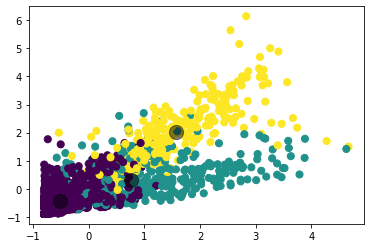

In [143]:
y_kmeans = kmeans.predict(skaters_transformed)
plt.scatter(skaters_transformed[:, 0], skaters_transformed[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Discussion of Results from KMeans Clustering

The results do not show clear clusters as we were hoping which may suggest that the sport of hockey has changed since enforcers played a heavy role. 

More analysis is necessary.

Below we attempted to find the optimal number of clusters using the 'elbow method'.

# Elbow Method in Determing the Optimal Number of Clusters

Applying the Elbow Method, the recommended number of clusters looks to be 5.

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(skaters_transformed)
    Sum_of_squared_distances.append(km.inertia_)

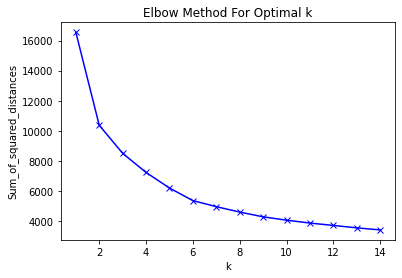

In [137]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()